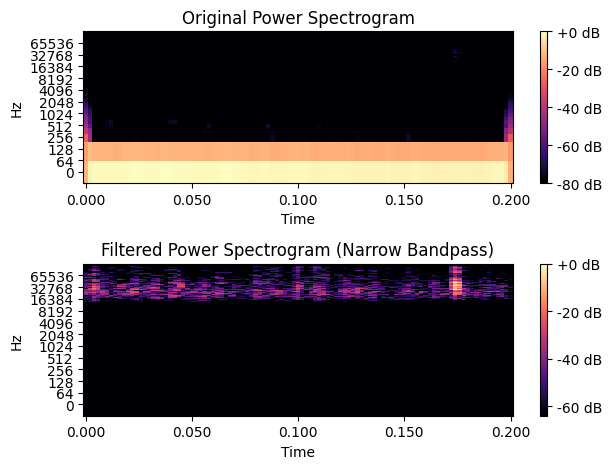

Mean Squared Difference: 0.862091672715191


In [1]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfreqz, sosfilt

# Given path for the WAV file
filepath = '../../.dataset/X_train/00001-JAM.wav'

try:
    # Load the audio file using librosa with the correct sample rate
    audio, sr = librosa.load(filepath, sr=256000)
except Exception as e:
    print("Error while reading the file:", str(e))
    raise

# Define a narrower bandpass filter to target the NBHF range around 130 kHz
low_cutoff = 20000  # Adjust based on the characteristics mentioned in the article
high_cutoff = 127999  # Adjust based on the characteristics mentioned in the article

# Design a bandpass filter using scipy's butterworth filter
sos = butter(N=6, Wn=[low_cutoff, high_cutoff], btype='band', fs=sr, output='sos')

# Apply the bandpass filter to the audio
filtered_audio = sosfilt(sos, audio)

# Compute the spectrogram for the original audio
D_original = librosa.stft(audio)
psd_original = np.abs(D_original)**2

# Compute the spectrogram for the filtered audio
D_filtered = librosa.stft(filtered_audio)
psd_filtered = np.abs(D_filtered)**2

# Display the original and filtered spectrograms
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(psd_original, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Original Power Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(psd_filtered, ref=np.max), y_axis='log', x_axis='time', sr=sr, fmin=low_cutoff, fmax=high_cutoff)
plt.colorbar(format='%+2.0f dB')
plt.title('Filtered Power Spectrogram (Narrow Bandpass)')

plt.tight_layout()
plt.show()

# Calculate the mean squared difference between the original and filtered spectrograms
mse = np.mean((psd_original - psd_filtered)**2)
print(f"Mean Squared Difference: {mse}")
